In [1]:
import numpy as np
import matplotlib.pyplot as plt

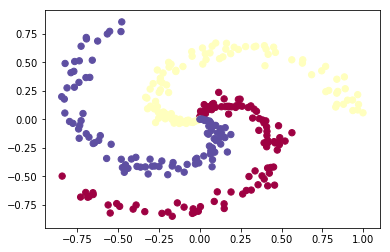

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# Must Preprocess so that mean and sd become stable here its -1 to 1

In [3]:
####### SOFT MAX
# Softmax classi�er has a linear score function and uses the cross-entropy loss
# Since this is a linear classi�er, we can compute all class scores


# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# compute class scores for a linear classifier
scores = np.dot(X, W) + b
print(scores)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -5.00010950e-05   5.92545300e-05  -1.70514110e-04]
 [ -5.87013175e-05   9.42789474e-05  -3.30766165e-04]
 [ -1.91612814e-04   2.00028378e-04  -5.10540057e-04]
 [ -2.17339881e-04   2.46571815e-04  -6.83105975e-04]
 [ -3.13463730e-04   3.30360642e-04  -8.51740495e-04]
 [ -5.49664134e-04   4.73071002e-04  -9.32293031e-04]
 [ -3.10863824e-04   3.92621673e-04  -1.18812398e-03]
 [ -5.94610224e-04   5.74241629e-04  -1.33869391e-03]
 [ -7.37521924e-04   6.76383047e-04  -1.47088997e-03]
 [ -8.67381580e-04   7.70814136e-04  -1.59956271e-03]
 [ -1.08206387e-03   8.89230459e-04  -1.61310788e-03]
 [ -9.54585692e-04   8.89549071e-04  -1.97827619e-03]
 [ -7.60557492e-04   8.30480631e-04  -2.21941696e-03]
 [ -1.39775398e-03   1.13648391e-03  -2.01938455e-03]
 [ -1.29048089e-03   1.15212417e-03  -2.40789647e-03]
 [ -1.39987024e-03   1.23789475e-03  -2.54917747e-03]
 [ -1.80607097e-03   1.39380166e-03  -2.21472661e-03]
 [ -2.03032460e-03   1.33711

In [4]:
##### LOSS

num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)    
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)     # Normalized values
correct_logprobs = -np.log(probs[range(num_examples),y])
#print(correct_logprobs)
data_loss = np.sum(correct_logprobs)/num_examples
reg = 1.5

reg_loss = 0.5*reg*np.sum(W*W)

loss = data_loss + reg_loss
print(loss)

1.09768501854


In [5]:
########## BACKPROPAGAION

dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

In [6]:
####### UPDATING

print(db)
# perform a parameter update
step_size = 0.5
W += -step_size * dW
b += -step_size * db

[[  2.61404787e-05  -1.25926701e-04   9.97862225e-05]]


In [7]:
######## SOFT MAX 
#Train a Linear Classifier
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength
# gradient descent loop
num_examples = X.shape[0]
for i in xrange(200):
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print "iteration %d: loss %f" % (i, loss)
        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples
        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
        dW += reg*W # regularization gradient
        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db       

iteration 0: loss 1.101036
iteration 10: loss 1.070140
iteration 20: loss 1.042666
iteration 30: loss 1.018187
iteration 40: loss 0.996331
iteration 50: loss 0.976772
iteration 60: loss 0.959223
iteration 70: loss 0.943439
iteration 80: loss 0.929206
iteration 90: loss 0.916336
iteration 100: loss 0.904671
iteration 110: loss 0.894071
iteration 120: loss 0.884415
iteration 130: loss 0.875598
iteration 140: loss 0.867530
iteration 150: loss 0.860130
iteration 160: loss 0.853330
iteration 170: loss 0.847067
iteration 180: loss 0.841289
iteration 190: loss 0.835947


In [8]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print(predicted_class)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2
 2 1 2 2]
training accuracy: 0.54


In [9]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2
#print(scores)
print(scores.shape)

(300, 3)


In [10]:
# backpropate the gradient to the parameters
# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)
dhidden = np.dot(dscores, W2.T)

# finally into W,b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

In [11]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))
# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength
# gradient descent loop
num_examples = X.shape[0]
for i in xrange(10000):
# evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
# compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print "iteration %d: loss %f" % (i, loss)
        # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
    
    
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.098668
iteration 1000: loss 0.291808
iteration 2000: loss 0.257296
iteration 3000: loss 0.244782
iteration 4000: loss 0.242229
iteration 5000: loss 0.241053
iteration 6000: loss 0.240059
iteration 7000: loss 0.238614
iteration 8000: loss 0.237207
iteration 9000: loss 0.236390


In [12]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.99
